In [1]:
"""
START INTRODUCTION WORK
"""

'\nSTART INTRODUCTION WORK\n'

In [2]:
import sys
sys.path.append('/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages')

import pandas as pd
import geopandas as gpd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

from gerrychain import (Partition, Graph, MarkovChain,
                        updaters, constraints, accept,
                        GeographicPartition)
from gerrychain.proposals import recom
from gerrychain.tree import bipartition_tree
from gerrychain.constraints import contiguous
from functools import partial

In [3]:
import random
random.seed(42)

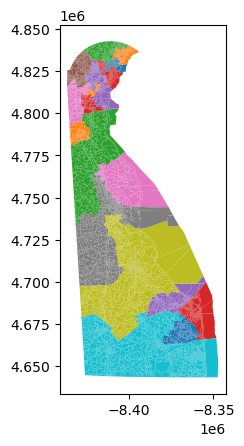

In [135]:
graph = Graph.from_file("DE_precincts.geojson")
    
my_updaters = {
    "population": updaters.Tally("POP20", alias="population"),
    "cut_edges": updaters.cut_edges,
    "perimeter": updaters.perimeter,
    "area": updaters.Tally("area", alias="area"),
}

initial_partition = GeographicPartition(
    graph,
    assignment="CONGDIST",
    updaters=my_updaters
)

initial_partition.plot()
plt.show()

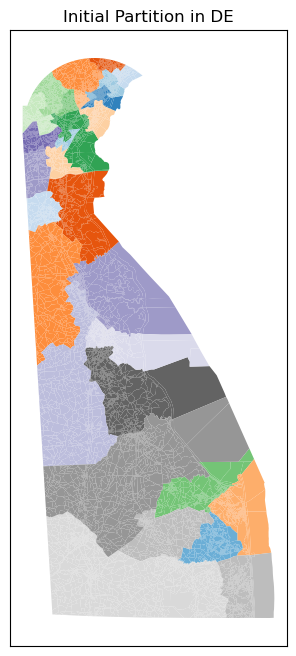

In [136]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Initial Partition in DE")
initial_partition.plot(ax=ax, cmap='tab20c')
plt.show()

In [137]:
ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)


proposal = partial(
    recom,
    pop_col="POP20",
    pop_target=ideal_population,
    epsilon=0.01,
    node_repeats=2,
)

recom_chain = MarkovChain(
    proposal=proposal,
    constraints=[contiguous],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=20,
)

In [138]:
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import pandas as pd

import matplotlib.cm as mcm
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

frames = []
district_data = []

for i, partition in enumerate(recom_chain):
    for district_name in partition.perimeter.keys():
        population = partition.population[district_name]
        perimeter = partition.perimeter[district_name]
        area = partition.area[district_name]
        district_data.append((i, district_name, population, perimeter, area))

    buffer = io.BytesIO()
    fig, ax = plt.subplots(figsize=(10,10))
    partition.plot(ax=ax, cmap='tab20')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = Image.open(buffer)
    frames.append(image)
    plt.close(fig)

df = pd.DataFrame(
    district_data,
    columns=[
        'step',
        'district_name',
        'population',
        'perimeter',
        'area'
    ]
)

def show_frame(idx):
    clear_output(wait=True)
    display(frames[idx])
    


slider = widgets.IntSlider(value=0, min=0, max=len(frames)-1, step=1, description='Frame:')
slider.layout.width = '500px'
widgets.interactive(show_frame, idx=slider)
# show_frame(2)

/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


interactive(children=(IntSlider(value=0, description='Frame:', layout=Layout(width='500px'), max=19), Output()…

/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/interaction.py:57: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


In [7]:
df.head(5)

,step,district_name,population,perimeter,area
0,0,27,24954,54719.068826,1.308136e+08
1,0,33,23735,142429.428754,7.794911e+08
2,0,20,23078,132885.416972,3.544749e+08
3,0,28,25703,147814.180372,7.777309e+08
4,0,41,25242,127053.034177,5.672241e+08


In [ ]:
"""
START PARTITION WORK
"""

In [33]:
from gerrychain import Partition, Graph
from gerrychain.updaters import cut_edges

graph = Graph.from_file("DE_precincts.geojson")
# graph = Graph.from_json("PA_VTDs.json")

In [52]:
graph.issue_warnings()

In [53]:
partition = Partition(graph, "CONGDIST", {"cut_edges": cut_edges})
# partition = Partition(graph, "2011_PLA_1", {"cut_edges": cut_edges})

In [54]:
partition.graph

In [55]:
partition.graph.nodes[0]

{'boundary_node': False,
 'area': 341049.06768521265,
 'id': '0',
 'STATEFP20': '10',
 'COUNTYFP20': '003',
 'TRACTCE20': '014811',
 'BLOCKCE20': '1026',
 'GEOID20': '100030148111026',
 'GEOIDFQ20': '1010000US100030148111026',
 'NAME20': 'Block1026',
 'MTFCC20': 'G5040',
 'UR20': 'R',
 'FUNCSTAT20': 'S',
 'ALAND20': 0,
 'AWATER20': 202579,
 'INTPTLAT20': '+39.5381631',
 'INTPTLON20': '-075.7643328',
 'HOUSING20': 0,
 'POP20': 0,
 'TOTAL_REG': 0,
 'AGE_18_19': 0,
 'AGE_20_24': 0,
 'AGE_25_29': 0,
 'AGE_30_34': 0,
 'AGE_35_44': 0,
 'AGE_45_54': 0,
 'AGE_55_64': 0,
 'AGE_65_74': 0,
 'AGE_75_84': 0,
 'AGE_85OVER': 0,
 'VOTERS_GENDER_M': 0,
 'VOTERS_GENDER_F': 0,
 'VOTERS_GENDER_UNKNOWN': 0,
 'PARTY_DEM': 0,
 'PARTY_REP': 0,
 'PARTY_OTHER': 1,
 'CONGDIST': '27',
 'geometry': <POLYGON ((-8435133.782 4798805.616, -8435093.039 4798808.648, -8434939.53 4...>}

In [56]:
first_ten_nodes = list(partition.graph.nodes)[:10]
for node in first_ten_nodes:
    print(partition.assignment[node])

27
33
20
28
41
09
09
17
02
32


In [57]:
for part in partition.parts:
    number_of_nodes = len(partition.parts[part])
    print(f"Part {part} has {number_of_nodes} nodes")

Part 27 has 248 nodes
Part 33 has 671 nodes
Part 20 has 666 nodes
Part 28 has 660 nodes
Part 41 has 899 nodes
Part 09 has 459 nodes
Part 17 has 483 nodes
Part 02 has 562 nodes
Part 32 has 457 nodes
Part 08 has 382 nodes
Part 23 has 305 nodes
Part 14 has 721 nodes
Part 04 has 645 nodes
Part 11 has 513 nodes
Part 16 has 479 nodes
Part 38 has 948 nodes
Part 06 has 473 nodes
Part 37 has 584 nodes
Part 40 has 757 nodes
Part 36 has 673 nodes
Part 30 has 786 nodes
Part 39 has 709 nodes
Part 15 has 298 nodes
Part 35 has 736 nodes
Part 18 has 241 nodes
Part 21 has 250 nodes
Part 07 has 389 nodes
Part 12 has 571 nodes
Part 31 has 409 nodes
Part 22 has 216 nodes
Part 29 has 489 nodes
Part 01 has 426 nodes
Part 24 has 319 nodes
Part 34 has 465 nodes
Part 13 has 517 nodes
Part 25 has 300 nodes
Part 03 has 407 nodes
Part 05 has 182 nodes
Part 26 has 173 nodes
Part 10 has 310 nodes
Part 19 has 420 nodes


In [58]:
for part, subgraph in partition.subgraphs.items():
    number_of_edges = len(subgraph.edges)
    print(f"Part {part} has {number_of_edges} edges")

Part 27 has 520 edges
Part 33 has 1539 edges
Part 20 has 1552 edges
Part 28 has 1544 edges
Part 41 has 2111 edges
Part 09 has 1020 edges
Part 17 has 1117 edges
Part 02 has 1214 edges
Part 32 has 1060 edges
Part 08 has 868 edges
Part 23 has 674 edges
Part 14 has 1649 edges
Part 04 has 1486 edges
Part 11 has 1131 edges
Part 16 has 1138 edges
Part 38 has 2251 edges
Part 06 has 1112 edges
Part 37 has 1312 edges
Part 40 has 1769 edges
Part 36 has 1574 edges
Part 30 has 1862 edges
Part 39 has 1658 edges
Part 15 has 647 edges
Part 35 has 1741 edges
Part 18 has 525 edges
Part 21 has 560 edges
Part 07 has 928 edges
Part 12 has 1340 edges
Part 31 has 952 edges
Part 22 has 448 edges
Part 29 has 1092 edges
Part 01 has 930 edges
Part 24 has 724 edges
Part 34 has 1095 edges
Part 13 has 1228 edges
Part 25 has 679 edges
Part 03 has 852 edges
Part 05 has 377 edges
Part 26 has 367 edges
Part 10 has 740 edges
Part 19 has 996 edges


In [59]:
import networkx
for part, subgraph in partition.subgraphs.items():
    diameter = networkx.diameter(subgraph)
    print(f"Part {part} has diameter {diameter}")

Part 27 has diameter 14
Part 33 has diameter 20
Part 20 has diameter 20
Part 28 has diameter 26
Part 41 has diameter 25
Part 09 has diameter 18
Part 17 has diameter 21
Part 02 has diameter 30
Part 32 has diameter 19
Part 08 has diameter 14
Part 23 has diameter 18
Part 14 has diameter 15
Part 04 has diameter 18
Part 11 has diameter 30
Part 16 has diameter 19
Part 38 has diameter 19
Part 06 has diameter 23
Part 37 has diameter 25
Part 40 has diameter 28
Part 36 has diameter 24
Part 30 has diameter 28
Part 39 has diameter 21
Part 15 has diameter 17
Part 35 has diameter 26
Part 18 has diameter 21
Part 21 has diameter 13
Part 07 has diameter 17
Part 12 has diameter 24
Part 31 has diameter 14
Part 22 has diameter 14
Part 29 has diameter 22
Part 01 has diameter 29
Part 24 has diameter 15
Part 34 has diameter 18
Part 13 has diameter 22
Part 25 has diameter 17
Part 03 has diameter 31
Part 05 has diameter 17
Part 26 has diameter 11
Part 10 has diameter 15
Part 19 has diameter 18


In [ ]:
"""
START RECOM WORK
"""

In [4]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election)
from gerrychain.proposals import recom
from PIL import Image
import pandas

In [5]:
"""graph = Graph.from_json("PA_VTDs.json")

elections = [
    Election("SEN10", {"Democratic": "SEN10D", "Republican": "SEN10R"}),
    Election("SEN12", {"Democratic": "USS12D", "Republican": "USS12R"}),
    Election("SEN16", {"Democratic": "T16SEND", "Republican": "T16SENR"}),
    Election("PRES12", {"Democratic": "PRES12D", "Republican": "PRES12R"}),
    Election("PRES16", {"Democratic": "T16PRESD", "Republican": "T16PRESR"})
]"""

graph = Graph.from_file("DE_precincts.geojson")

elections = [
    Election("REPXX", {"Democratic": "PARTY_DEM", "Republican": "PARTY_REP"})
]

In [6]:
# Population updater, for computing how close to equality the district
# populations are. "TOTPOP" is the population column from our shapefile.
my_updaters = {"population": updaters.Tally("POP20", alias="population")}

# Election updaters, for computing election results using the vote totals
# from our shapefile.
election_updaters = {election.name: election for election in elections}
my_updaters.update(election_updaters)

In [7]:
initial_partition = GeographicPartition(
    graph, 
    assignment="CONGDIST", 
    updaters=my_updaters
)

In [8]:
initial_partition.graph.nodes[0]

{'boundary_node': False,
 'area': 341049.06768521265,
 'id': '0',
 'STATEFP20': '10',
 'COUNTYFP20': '003',
 'TRACTCE20': '014811',
 'BLOCKCE20': '1026',
 'GEOID20': '100030148111026',
 'GEOIDFQ20': '1010000US100030148111026',
 'NAME20': 'Block1026',
 'MTFCC20': 'G5040',
 'UR20': 'R',
 'FUNCSTAT20': 'S',
 'ALAND20': 0,
 'AWATER20': 202579,
 'INTPTLAT20': '+39.5381631',
 'INTPTLON20': '-075.7643328',
 'HOUSING20': 0,
 'POP20': 0,
 'TOTAL_REG': 0,
 'AGE_18_19': 0,
 'AGE_20_24': 0,
 'AGE_25_29': 0,
 'AGE_30_34': 0,
 'AGE_35_44': 0,
 'AGE_45_54': 0,
 'AGE_55_64': 0,
 'AGE_65_74': 0,
 'AGE_75_84': 0,
 'AGE_85OVER': 0,
 'VOTERS_GENDER_M': 0,
 'VOTERS_GENDER_F': 0,
 'VOTERS_GENDER_UNKNOWN': 0,
 'PARTY_DEM': 0,
 'PARTY_REP': 0,
 'PARTY_OTHER': 1,
 'CONGDIST': '27',
 'geometry': <POLYGON ((-8435133.782 4798805.616, -8435093.039 4798808.648, -8434939.53 4...>}

In [9]:
# The ReCom proposal needs to know the ideal population for the districts so that
# we can improve speed by bailing early on unbalanced partitions.

ideal_population = sum(initial_partition["population"].values()) / len(initial_partition)

# We use functools.partial to bind the extra parameters (pop_col, pop_target, epsilon, node_repeats)
# of the recom proposal.
proposal = partial(
    recom,
    pop_col="POP20",
    pop_target=ideal_population,
    epsilon=0.02,
    node_repeats=2
)

In [10]:
def cut_edges_length(p):
  return len(p["cut_edges"])

compactness_bound = constraints.UpperBound(
  cut_edges_length,
  2*len(initial_partition["cut_edges"])
)

pop_constraint = constraints.within_percent_of_ideal_population(initial_partition, 0.1)

In [11]:
pop_constraint

<Bounds(population,(21730.565853658536, 26559.58048780488))>

In [12]:
compactness_bound

<UpperBound(cut_edges_length >= 4116)>

In [17]:
compactness_bound = constraints.UpperBound(
  lambda p: len(p["cut_edges"]),
  2*len(initial_partition["cut_edges"])
)

In [18]:
chain = MarkovChain(
    proposal=proposal,
    constraints=[
        pop_constraint,
        compactness_bound
    ],
    accept=accept.always_accept,
    initial_state=initial_partition,
    total_steps=1000
)

In [20]:
from tqdm import tqdm
# This might take a few minutes.
"""data = pandas.DataFrame(
    sorted(partition["REPXX"].percents("Democratic"))
    for partition in chain.with_progress_bar()
)""" # more elegant but doesnt keep track of the final partition

d_percents = []
for partition in chain.with_progress_bar():
    d_percents.append(sorted(partition["REPXX"].percents("Democratic")))

data = pandas.DataFrame(d_percents)

/Users/c/Desktop/Desktop_Funnel/anaconda3/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


  0%|          | 0/1000 [00:00<?, ?it/s]

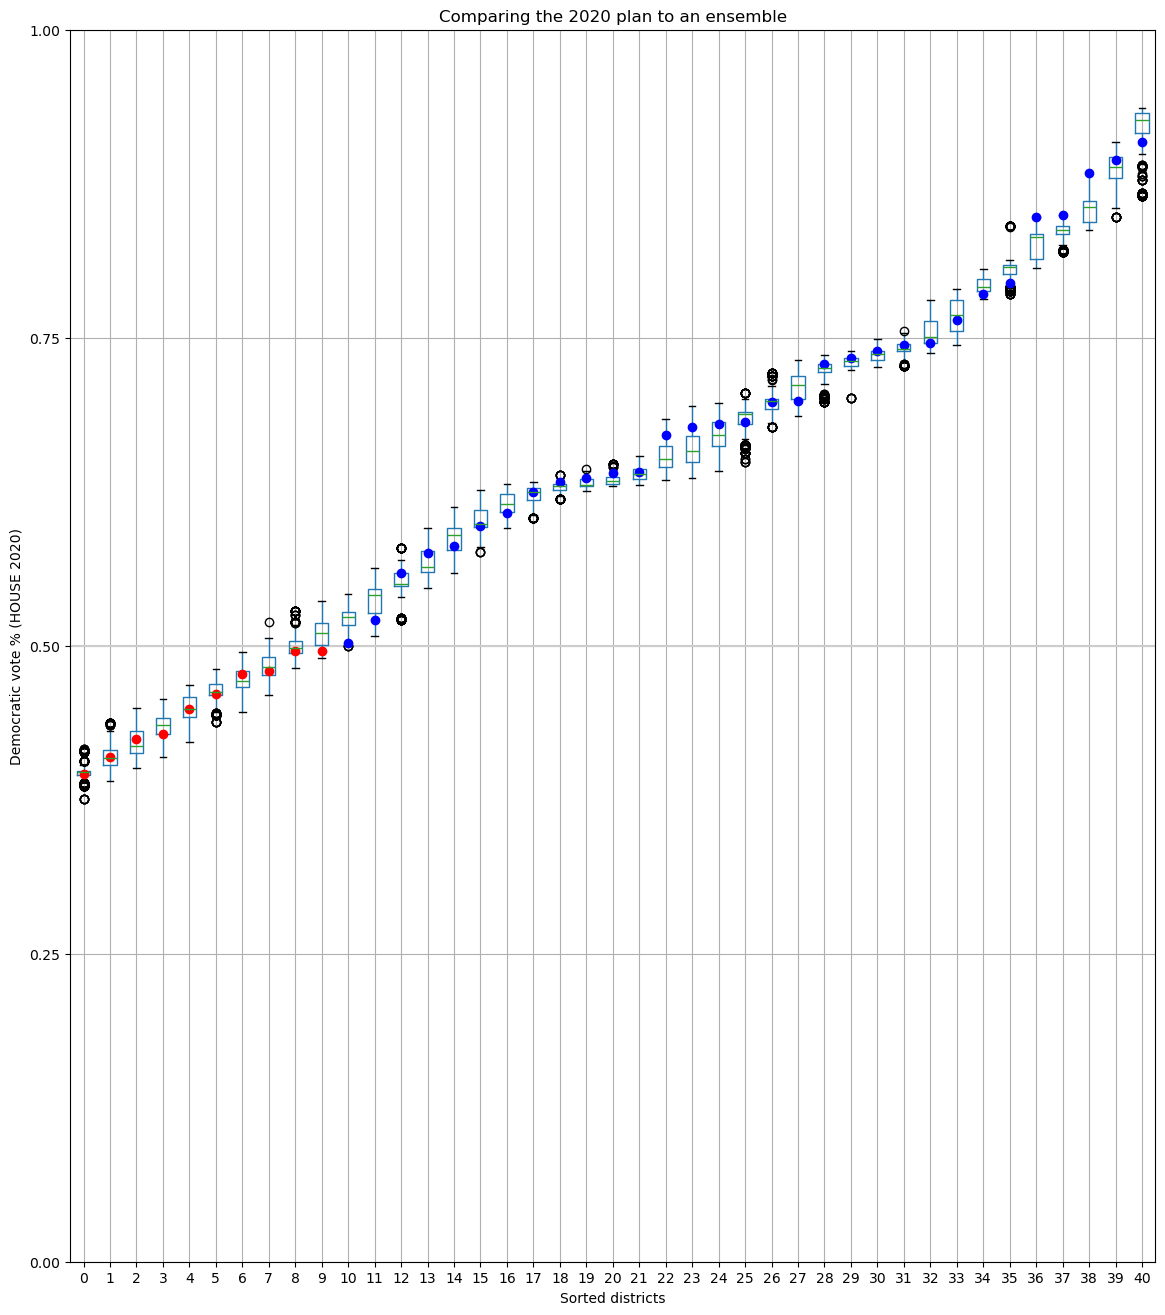

In [40]:
fig, ax = plt.subplots(figsize=(14, 16))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
data.boxplot(ax=ax, positions=range(len(data.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row)
# plt.plot(data.iloc[0], "ro")
# Plotting with condition
for index, value in data.iloc[0].items():
    if value > 0.5:
        plt.plot(index, value, "bo")
    else:
        plt.plot(index, value, "ro")

# Annotate
ax.set_title("Comparing the 2020 plan to an ensemble")
ax.set_ylabel("Democratic vote % (HOUSE 2020)")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])

plt.show()

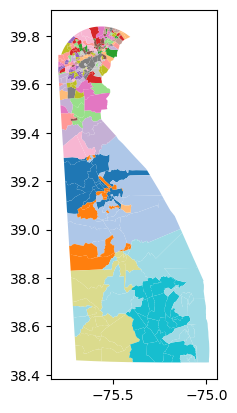

In [22]:
de = gpd.read_file('de_shapefile.zip')
de.plot(cmap='tab20')
plt.show()

In [28]:
print(data)

           0         1         2         3         4         5         6   \
0    0.396241  0.409415  0.424205  0.428367  0.448344  0.460813  0.477057   
1    0.396241  0.409415  0.424205  0.428367  0.448344  0.462359  0.477057   
2    0.396241  0.409415  0.424205  0.428367  0.448344  0.462359  0.477057   
3    0.396241  0.413343  0.424205  0.428367  0.448344  0.462359  0.474266   
4    0.396241  0.413343  0.424205  0.428367  0.448344  0.462359  0.474266   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
996  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
997  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
998  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   
999  0.395589  0.398062  0.413282  0.433386  0.433748  0.468312  0.473073   

           7         8         9   ...        31        32        33       

In [34]:
# POSTPROCESSING: data for boxplot

# input fields you would like here
q1 = []
median = []
q3 = []
minimum = []
maximum = []

def get_bounds(q1, q3, col, bound=1.5):
    iqr = q3 - q1
    lower_bound = q1 - (bound * iqr)
    upper_bound = q3 + (bound * iqr)
    filtered_col = col[(col > lower_bound) & (col < upper_bound)]
    return filtered_col.min(), filtered_col.max()
    

for district in data.columns:
    lower = data[district].quantile(0.25)
    upper = data[district].quantile(.75)
    lower_bound, upper_bound = get_bounds(lower, upper, data[district])
    
    q1.append(lower)
    median.append( data[district].quantile(.5) )
    q3.append(upper)
    minimum.append(lower_bound)
    maximum.append(upper_bound)
    
print(f"MIN: {minimum}\n\n")
print(f"LOWER: {q1}\n\n")
print(f"MED: {median}\n\n")
print(f"UPPER: {q3}\n\n")
print(f"MAX: {maximum}\n\n")

MIN: [0.38956792526274814, 0.39040832049306623, 0.4006044959385429, 0.4096896628711766, 0.422047038895042, 0.4463959019392609, 0.4463959019392609, 0.4601606963508537, 0.48163815829808104, 0.4899300221880867, 0.5020981278244029, 0.5081121366737373, 0.5395470677708298, 0.5467950846894719, 0.559370123421762, 0.5802532075792336, 0.5956247027651335, 0.6064799632714633, 0.6215413588294945, 0.6251930908580255, 0.6293884951376298, 0.6303937520338432, 0.6348419094854308, 0.6364263539151431, 0.6414318354912414, 0.6678674915811732, 0.6804273566392907, 0.6861867968008676, 0.7124453466583386, 0.7237559645535105, 0.7262555517594806, 0.7306843267108167, 0.7378448889240257, 0.7444568102046057, 0.7813756141134435, 0.792326431181486, 0.8063360881542699, 0.8252345071505459, 0.8370888157894737, 0.855227334603866, 0.8994611457742484]


LOWER: [0.39473828747185147, 0.40309708159618823, 0.41307692307692306, 0.4283666643915091, 0.44214267140504465, 0.45986110073930253, 0.4661752284419873, 0.4765651154308716, 

<Axes: >

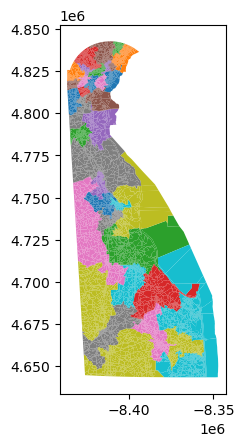

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
partition.plot(ax=ax, cmap='tab20')
ax.set_xticks([])
ax.set_yticks([])

In [39]:
# partition.graph.to_json(json_file="seawulf_sample.geojson", include_geometries_as_geojson=True)